In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(4)

(50000, 32, 32, 3) (50000, 1)
label :  [6]
(50000, 32, 32, 3) (50000, 10)


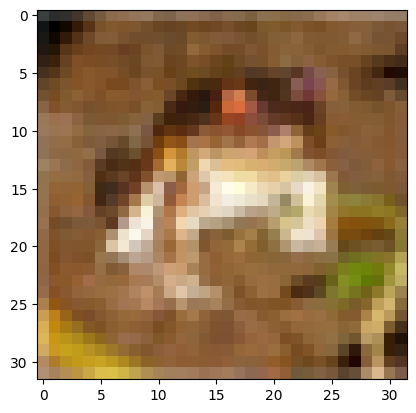

In [3]:
# dataset CIFAR 10
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets

# Dataset Load
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

# Dataset Confirm
print(X_train.shape, Y_train.shape)
print('label : ',Y_train[0])
plt.imshow(X_train[0])

# Dataset Preprocessing
X_train = X_train/255.0
X_test = X_test/255.0
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

print(X_train.shape, Y_train.shape)

In [4]:
# library import for modeling
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation,Lambda
from tensorflow.keras.layers import Flatten, BatchNormalization, Dropout, ReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [5]:
n_in = X_train.shape[1:]
n_out = Y_train.shape[-1]
print(n_in)
print(n_out)

(32, 32, 3)
10


In [6]:
# AlexNet model structure check
# To fit the code to cifar-10, chaged the kernel or pool size
# To improve accuracy, choose batch nomalizatoin that has better performance than local response normalization

model = Sequential()

# conv 1 layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu', input_shape=(n_in)))
# model.add(Lambda(tf.nn.local_response_normalization, arguments={'depth_radius': 2, 'bias': 1.0, 'alpha': 0.0001, 'beta': 0.75}))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# con 2 valid
model.add(Conv2D(192, kernel_size=(3, 3),padding='same', strides=(1, 1), activation='relu'))
# model.add(Lambda(tf.nn.local_response_normalization, arguments={'dep/th_radius': 2, 'bias': 1.0, 'alpha': 0.0001, 'beta': 0.75}))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# conv 3 layer
model.add(Conv2D(384, kernel_size=(3, 3),padding='same', strides=(1, 1), activation='relu'))

# conv 4 layer
model.add(Conv2D(384, kernel_size=(3, 3),padding='same', strides=(1, 1), activation='relu'))

# conv 5 layer
model.add(Conv2D(256, kernel_size=(3, 3),padding='same', strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(Flatten())

# fc 1 layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# fc 2 layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# fc 3 layer
model.add(Dense(n_out, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 192)       110784    
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 192)      768       
 hNormalization)                                                 
                                                        

In [7]:
from tensorflow.keras.optimizers import Adam

# optimizer = Adam(learning_rate=1e-6,weight_decay=0.3)

optimizer = Adam(learning_rate=3e-5,weight_decay=0.3, beta_1 = 0.95, beta_2 = 0.99, epsilon=1e-8)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # define the data generator with the desired transformations
# datagen = ImageDataGenerator(
#     rotation_range=20, # rotate the image up to 20 degrees
#     width_shift_range=0.1, # shift the image horizontally up to 10% of the width
#     height_shift_range=0.1, # shift the image vertically up to 10% of the height
#     horizontal_flip=True, # flip the image horizontally
#     zoom_range=0.1 # zoom in or out up to 10%
# )


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# fit the data generator to your training data
datagen.fit(X_train)

In [9]:
# Train the model
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(monitor='val_accuracy', patience=30, verbose=1, mode='auto',restore_best_weights=True)
# history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_split=0.2, callbacks=[earlystopper])
# train the model with the data generator
history = model.fit(datagen.flow(X_train[:-10000], Y_train[:-10000], batch_size=128),
                    epochs=300,
                    validation_data=(X_train[-10000:],Y_train[-10000:]),
                    verbose=1, callbacks=[earlystopper])


# history = model.fit(datagen.flow(X_train[:-10000], Y_train[:-10000], batch_size=128), epochs=100, validation_data=(X_train[-10000:],Y_train[-10000:]), verbose=1, callbacks=[earlystopper])

Epoch 1/300
313/313 [==============================] - 35s 89ms/step - loss: 1.7476 - accuracy: 0.3613 - val_loss: 2.2223 - val_accuracy: 0.1663
Epoch 2/300
313/313 [==============================] - 27s 88ms/step - loss: 1.3838 - accuracy: 0.4976 - val_loss: 1.2078 - val_accuracy: 0.5863
Epoch 3/300
313/313 [==============================] - 26s 85ms/step - loss: 1.2429 - accuracy: 0.5515 - val_loss: 1.1400 - val_accuracy: 0.5997
Epoch 4/300
313/313 [==============================] - 26s 84ms/step - loss: 1.1436 - accuracy: 0.5913 - val_loss: 1.1289 - val_accuracy: 0.6036
Epoch 5/300
313/313 [==============================] - 27s 86ms/step - loss: 1.0705 - accuracy: 0.6171 - val_loss: 0.9348 - val_accuracy: 0.6694
Epoch 6/300
313/313 [==============================] - 26s 83ms/step - loss: 1.0151 - accuracy: 0.6381 - val_loss: 0.9351 - val_accuracy: 0.6739
Epoch 7/300
313/313 [==============================] - 27s 86ms/step - loss: 0.9748 - accuracy: 0.6568 - val_loss: 0.9386 - val_ac

In [10]:
# evaluate
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=128)
print('Test loss:%.4f'%(test_loss))
print('Test accuracy:%.4f'%(test_accuracy))

79/79 [==============================] - 1s 11ms/step - loss: 0.5737 - accuracy: 0.8478
Test loss:0.5737
Test accuracy:0.8478


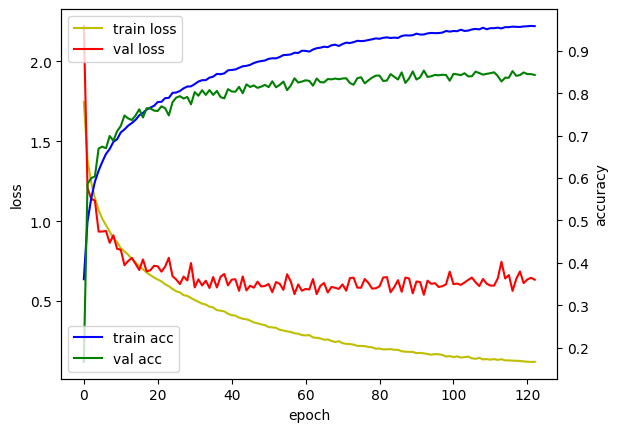

In [11]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()